<a href="https://colab.research.google.com/github/marcosvnespolo/Portifolio/blob/main/Previs%C3%A3o_de_custos_plano_de_sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema de Negócio
O objetivo do projeto é desenvolver uma metodologia para previsão do valor de um plano de saúde.

O dataset utilizado pode ser obtido no seguinte link:
https://drive.google.com/file/d/1GZieas3ULXK5HKE-FIRPxkyI5fXBClDS/view?usp=sharing

## Análise exploratória

In [3]:
# Importando bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando a base de dados de treino:
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Plano de Saúde/Train_Data.csv')
train_data

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


In [5]:
# Checando a existência de valores nulos 
print(train_data.isnull().sum())

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64


In [6]:
# obtendo informações sobre os dados
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB
None


In [7]:
train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


## Avaliando a variável "Charges" (nosso target)

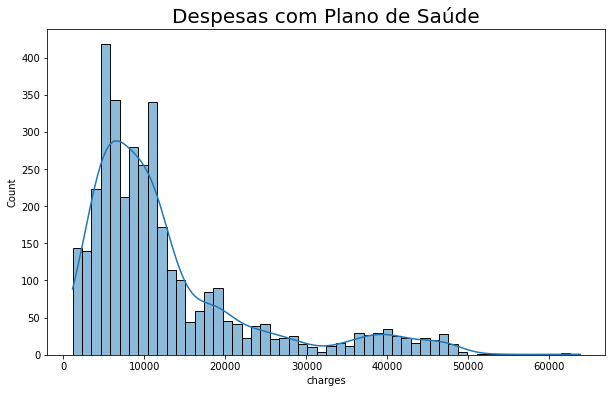

In [8]:
# Plotando um histograma
plt.figure(figsize=(10,6))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize = 20)
plt.show()

In [ ]:
# Trata-se de uma distribuição assimétrica à direita, 
# desta forma podemos confirmar a esxistência de outliers através de um boxplot
plt.figure(figsize=(10,6))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde', fontsize = 20)
plt.show()

Podemos fazer uma avaliação de cada variável separadamente para obter informações relevantes.

## Age

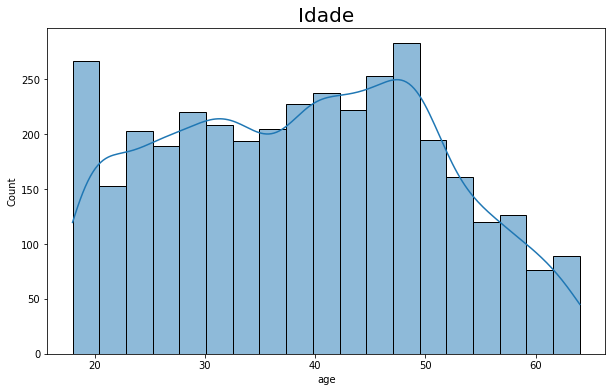

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


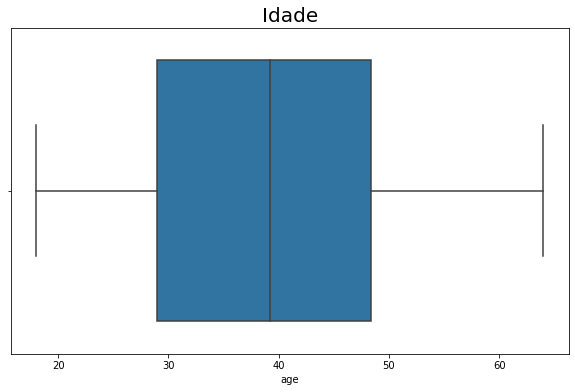

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(train_data['age'])
plt.title('Idade', fontsize = 20)
plt.show()

## BMI 

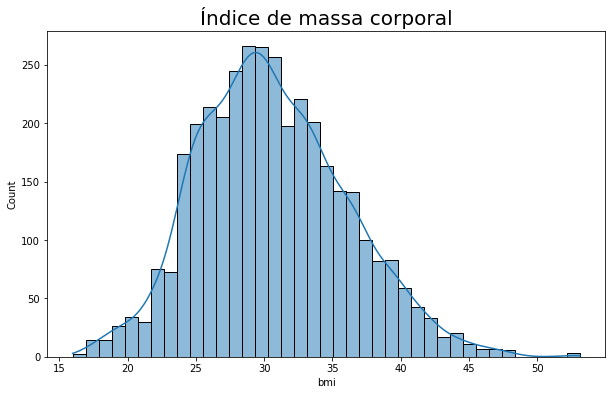

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Índice de massa corporal', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


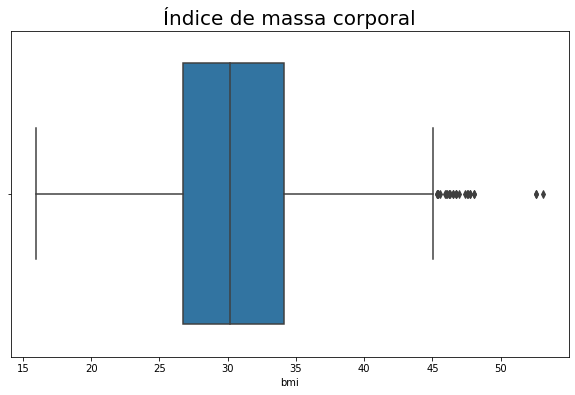

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(train_data['bmi'])
plt.title('Índice de massa corporal', fontsize = 20)
plt.show()

## Children

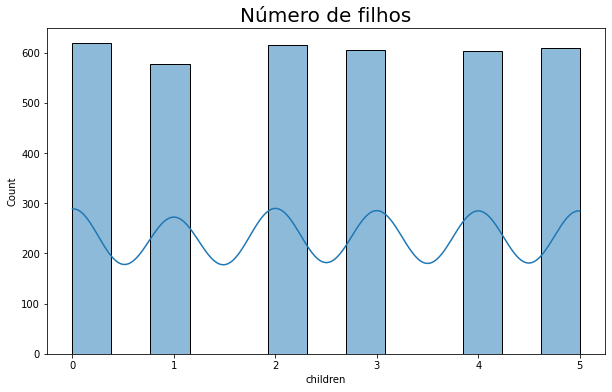

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['children'], kde=True)
plt.title('Quantidade de filhos', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


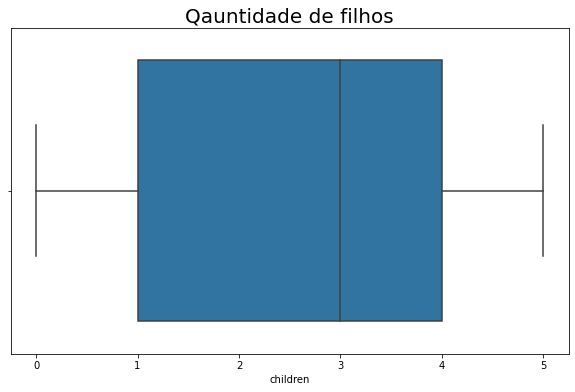

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(train_data['children'])
plt.title('Qauntidade de filhos', fontsize = 20)
plt.show()

## Sex

Male   : 2029
Female : 1601


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


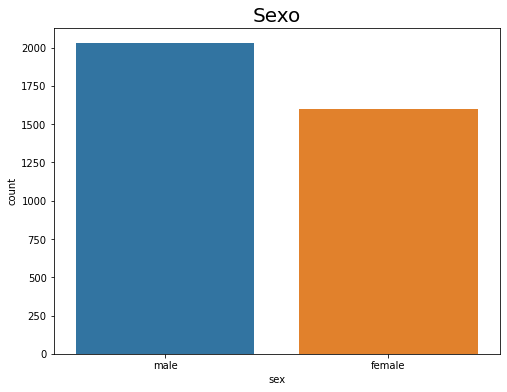

In [43]:
# Value counts:
print('Male   :', train_data['sex'].value_counts()[0])
print('Female :', train_data['sex'].value_counts()[1])

#Visualization:
plt.figure(figsize=(8, 6))
sns.countplot(train_data['sex'])
plt.title('Sexo', fontsize=20)
plt.show()

# Smokers

Smokers   : 560
Non-Smokers : 3070


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


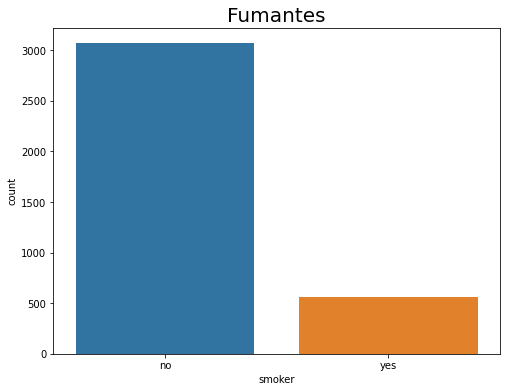

In [42]:
# Value counts:
print('Smokers   :', train_data['smoker'].value_counts()[1])
print('Non-Smokers :', train_data['smoker'].value_counts()[0])

#Visualization:
plt.figure(figsize=(8, 6))
sns.countplot(train_data['smoker'])
plt.title('Fumantes', fontsize=20)
plt.show()

## Region


South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


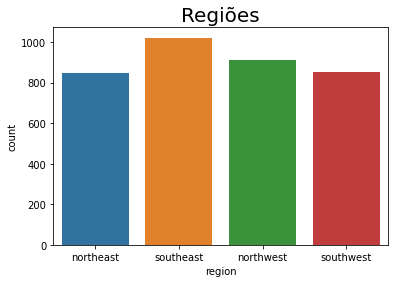

In [44]:
# Value Counts
print('South-East region :', train_data['region']. value_counts()[0])
print('North-West region :', train_data['region']. value_counts()[1])
print('South-West region :', train_data['region']. value_counts()[2])
print('North-East region :', train_data['region']. value_counts()[3])

# Visualization
sns.countplot(train_data['region'])
plt.title('Regiões', fontsize=20)
plt.show()

In [45]:
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


## Pré Processamento dos Dados

In [49]:
# É interessante arredondar os dados na variável Age
train_data['age'] = round(train_data['age'])
train_data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [51]:
# OHEncoding: Tranformar variáveis categóricas em numéricas
train_data = pd.get_dummies(train_data, drop_first=True)
train_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0
2,18.0,30.030000,1,1720.353700,1,0,0,1,0
3,37.0,30.676891,3,6801.437542,1,0,0,0,0
4,58.0,32.010000,1,11946.625900,1,0,0,1,0


In [52]:
# Colunas do Dataset
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [56]:
# Rearranjando colunas para melhor visualização
train_data = train_data[['age', 'sex_male', 'smoker_yes', 'bmi', 'children', 'region_northwest','region_southeast', 'region_southwest', 'charges']]
train_data.head()

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,1,0,21454.494239
2,18.0,1,0,30.030000,1,0,1,0,1720.353700
3,37.0,1,0,30.676891,3,0,0,0,6801.437542
4,58.0,1,0,32.010000,1,0,1,0,11946.625900


In [61]:
# Realizando o split para variáveis de entrada e saída
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [62]:
x.head()

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0


In [63]:
y.head()

0     3279.868550
1    21454.494239
2     1720.353700
3     6801.437542
4    11946.625900
Name: charges, dtype: float64

In [64]:
# Separando os dados de treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Construção e avaliação do modelo


In [65]:
# importando métricas de avaliação da máquina preditiva (MP)
from sklearn.metrics import mean_squared_error, r2_score 

##MP com Regressão Linear

In [70]:
# Regressão Linear
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Predição
y_pred = LinearRegression.predict(x_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482602892322037
30898859.03596079


## MP com regressão Ridge

In [71]:
# Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge =Ridge.fit(x_train, y_train)

# Predição
y_pred = Ridge.predict(x_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.748102888431925
30918178.614604652


## MP com Regressão Lasso

In [72]:
# Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(x_train, y_train)

# Predição
y_pred = Lasso.predict(x_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482269824960902
30902947.14800708


## MP com Random Forest

In [76]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Predição
y_pred = RandomForestRegressor.predict(x_test)

# Scores
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9060419744964127
11532530.074329231


Desta forma, através da avaliação das métricas produzidas, o algorítimo utilizado será o RandomForestRegressor.

## Salvando a máquina preditiva para Deploy

In [80]:
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))